## 11주차: 카운트기반 텍스트 시각화 _ 루지아다스

In [22]:
#주피터는 pprint안해도됨
import pprint
import requests
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter

In [5]:
url ='http://www.gutenberg.org/ebooks/3333.txt.utf-8'
res = requests.get(url)

print(res.status_code)

with open('lusiadas.txt','wb') as f :
    f.write(res.content)

200


In [9]:
pwd

'C:\\Users\\bestl\\OneDrive\\바탕 화면\\24-1\\포르투갈어 데이터마이닝'

In [16]:
raw_text = ''
print(raw_text)

In [17]:
with open('lusiadas.txt','r', encoding = 'utf-8-sig') as f:
    raw_text = f.read()

In [18]:
# 영어도 포함되어있음. 우리는 포어자료만 필요한디
print(raw_text)

The Project Gutenberg eBook of Os Lusíadas
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Os Lusíadas

Author: Luís de Camões

Release date: July 1, 2002 [eBook #3333]
                Most recently updated: February 4, 2007

Language: Portuguese

Credits: Produced by Maria Helena Moreira Rodriques and Victor Calha


*** START OF THE PROJECT GUTENBERG EBOOK OS LUSÍADAS ***




Produced by Maria Helena Moreira Rodriques and Victor Calha





Luís Vaz de Camões
Os Lusíadas

Canto Primeiro

1
As armas e os barões assinalados,
Que da ocidental praia Lusitana,
Por mares nunca de antes naveg

### 영어 포어 정제
- 워드 프로세서에 불러들여서 블록째 정제해보기


### lusiadas의 내용
- 까몽이스가 지은 책
- 바스코 다가마가 인도까지 다녀오는 대서사 시
- 시 안에서 모든 여행을 주관하는 인물이 신 (예수X, 로마신들)
- 포르투갈을 방해하는 신은 디오니소스(바쿠스)
- 도움을 주는 신은 아프로디테(비너스)


In [23]:
with open('lusiadas_por.txt','r', encoding = 'utf-8') as f:
    raw_text = f.read()

In [25]:
import re

plain_text = re.sub('[.:;,?!“()0-9\"]','',raw_text)
low_case_text = plain_text.lower()
print(low_case_text)

the project gutenberg ebook of os lusíadas
    
title os lusíadas

author luís de camões

release date july   [ebook #]
                most recently updated february  

language portuguese

credits produced by maria helena moreira rodriques and victor calha



produced by maria helena moreira rodriques and victor calha



luís vaz de camões
os lusíadas

canto primeiro


as armas e os barões assinalados
que da ocidental praia lusitana
por mares nunca de antes navegados
passaram ainda além da taprobana
em perigos e guerras esforçados
mais do que prometia a força humana
e entre gente remota edificaram
novo reino que tanto sublimaram


e também as memórias gloriosas
daqueles reis que foram dilatando
a fé o império e as terras viciosas
de áfrica e de ásia andaram devastando
e aqueles que por obras valerosas
se vão da lei da morte libertando
cantando espalharei por toda parte
se a tanto me ajudar o engenho e arte


cessem do sábio grego e do troiano
as navegações grandes que fizeram
cale-se

## 변형 동사에 대해
- 표제어 추출, 어간 추출 등을 통해 ter, tem, tenho 등을 똑같이 만들어주는 처리
- 포어는 Spacy로 사용

In [26]:
words = TreebankWordTokenizer().tokenize(low_case_text)
stopwords = nltk.corpus.stopwords.words('portuguese')

text_no_stopwords = []
for word in words:
    if word not in stopwords:
        # write는 누적하지 않음. append로 계속 추가해줘야함
        text_no_stopwords.append(word)
        
text_no_stopwords

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'lusíadas',
 'title',
 'lusíadas',
 'author',
 'luís',
 'camões',
 'release',
 'date',
 'july',
 '[',
 'ebook',
 '#',
 ']',
 'most',
 'recently',
 'updated',
 'february',
 'language',
 'portuguese',
 'credits',
 'produced',
 'by',
 'maria',
 'helena',
 'moreira',
 'rodriques',
 'and',
 'victor',
 'calha',
 'produced',
 'by',
 'maria',
 'helena',
 'moreira',
 'rodriques',
 'and',
 'victor',
 'calha',
 'luís',
 'vaz',
 'camões',
 'lusíadas',
 'canto',
 'primeiro',
 'armas',
 'barões',
 'assinalados',
 'ocidental',
 'praia',
 'lusitana',
 'mares',
 'nunca',
 'antes',
 'navegados',
 'passaram',
 'ainda',
 'além',
 'taprobana',
 'perigos',
 'guerras',
 'esforçados',
 'prometia',
 'força',
 'humana',
 'gente',
 'remota',
 'edificaram',
 'novo',
 'reino',
 'tanto',
 'sublimaram',
 'memórias',
 'gloriosas',
 'daqueles',
 'reis',
 'dilatando',
 'fé',
 'império',
 'terras',
 'viciosas',
 'áfrica',
 'ásia',
 'andaram',
 'devastando',
 'obras',
 

In [27]:
# 리스트는 중복되는 원소들이 있다
from collections import Counter

frequency = Counter(text_no_stopwords)
fre = frequency.items()
top_ten = sorted(fre, key = lambda x: x[1], reverse = True)[:10]
print(top_ten)

[('gente', 230), ('terra', 222), ('tão', 210), ('rei', 203), ('mar', 188), ('onde', 177), ('grande', 138), ('tanto', 132), ('--', 114), ('ali', 103)]


In [28]:
# 시각화 wordCloud
from wordcloud import WordCloud
wc = WordCloud(background_color='white', width=400, height=200)
cloud = wc.fit_words(frequency)

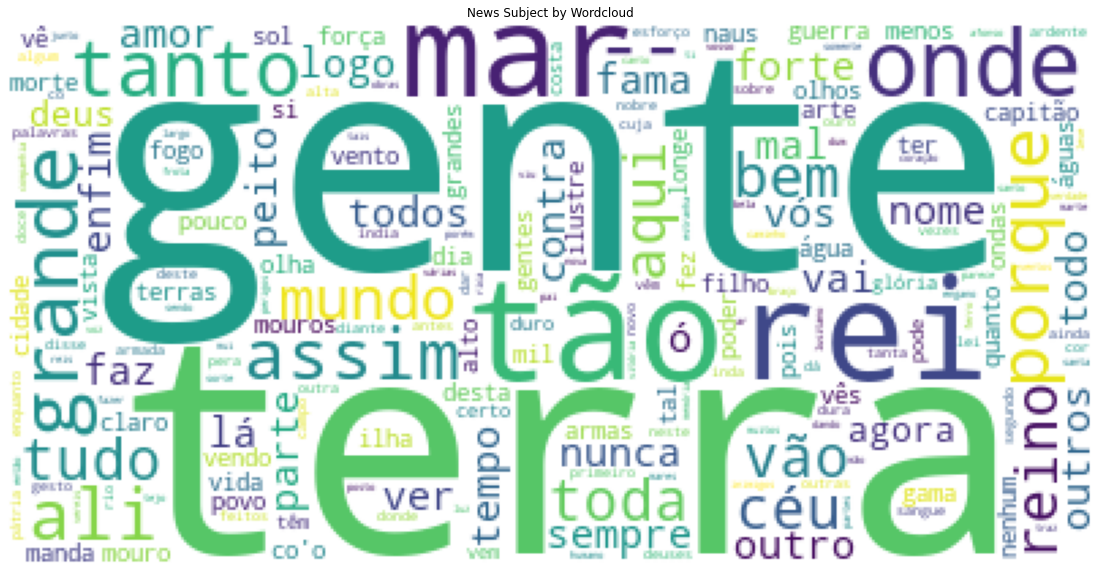

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('News Subject by Wordcloud')
plt.imshow(cloud)
plt.show()

## 텍마 11: 통계 분석을 통한 유사도 측정
- 카운트 기반 문서와 유사도 측정
- exist, frequency 등이 사용된다


### BoW: Bag of Words
- 단어 바구니 : 토큰을 빈도수별로 모아둔 바구니
- 빈도를 기반으로 BoW가 구성된다. 막 흔들어서 바구니에 집어둔 것이라고 생각하면됨
    - 때문에 순서, 문맥 연관성이 반영되지 않는다
    - 단어 존재에 초점이 맞춰진다.
    
- 어떤 성격의 문서인지 판단할 때 주로 쓰인다. 


### 워드임베딩
- 텍스트로부터 변환된 정형화된 데이터는 일정한 길이의 벡터를 말한다
- 주어진 텍스트를 일정한 길이의 벡터로 변환하는 것을 임베딩이라고 함.
- 주로 문장임베딩, 문서 임베딩이 있다

### 벡터 _ 우리는 2차원, 3차원 위주로 봐야한다.
- 만약 abc, a, ab가 있다면
1. abc를 기준으로 벡터공간을 세개로 잡고 시작한다. 
    - 즉 단어길이 (or 문장 길이)가 벡터가 된다
    - I love you, you love apple 이 있다면 I love you apple 을 바탕으로 만들어짐
    - A는 1110, B는 0111로 구성
    
### 정수인코딩
- BoW에서 기계가 알아서 붙여주는 정수 인덱스
- 보통 빈도 순

#### one-hot encoding
- 존재여부에 따른 이진적 특성에 따른 인코딩
- 0, 1로 존재를 나타낸다
- 단어가 많아질 수록 벡터 길이는 길어진다.
- 희소행렬(sparse matrix) 증가 (0이 많아지고 길어지는) _ 처리가 안되는건 아니지만 쓸 곳이 없는 행렬이 많아진다. 


### 문서임베딩
- 문서 하나하나로 봐서 빈도를 나타내주기


### DTM(문서단어 행렬)
- Document Term Matrix
- 다수의 문서에 등장하는 각 단어들의 빈도를 행렬로표현하는 것. 

### TF-IDF 문서 계산

#### TF: Term Frequency
- 문서 내 특정 단어 빈도수
- tf(t,d) : Term, Document 해서 t의 빈도수(f)
    - 문서안에 포함되는 단어의 개수를 대입하여 더하고 위에 빈도를 분자로 주기
    - 해당 문서에 등장하는 단어 빈도수 / 전체 문서에 등장하는 수

#### DF: 문서빈도 (Document Freq)
- 전체 문서집합 D에서 특정 단어 t가 등장한 문서 d의 수
- {d ∈ D : t ∈ d}는 모든 문서 D 중에서 용어 t를 포함하는 모든 문서 d의 집합을 의미

#### IDF: 역문서빈도
- 로그 씌워 수를 줄여주기
- 문서 전반적으로 빈도가 높은 단어에 대한 연산 (조사, 관사 같은)

#### TF IDF : 단어빈도 역문서 빈도
- 단어 가중치를 부여하는 인코딩 방법
- 특정 문서 내에 단어 빈도가 높을 수록 전체 문서에서, 그 단어를 포함한 문서가 적을 수록 TF-IDF값이 높아진다. 
- 문서와 문서를 distinguish해줄 수 있는 지표

### 벡터크기 : L2 Norm

- 원점으로의 거리
    - 내적계산
 
- 판다스에서 열의 내용을 행으로 받아줄 수 있는 방법임 (column vector to row vector) 

- 유사도 검사를 위해 배우는 중 _ 문서간에 얼마나 비슷한가
    - 코사인유사도, 유클리드, 레반슈타인, 자카드 유사도 
    - 수업에는 코사인 유사도 위주로 할 것
    
#### 코사인 유사도
- -1이면 역방향, 0유사성이 없는 것, 1은 유사성이 높은 것
- 나중에 코사인 similarity 연산하려면 계산할 줄 알아야함

### 담주 과제: 워드클라우드 제작

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import TreebankWordTokenizer
from collections import Counter

C:\Users\bestl\anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [31]:
# 성공~~
url = 'https://www.bbc.com/portuguese/articles/cl40kjgnj5ko'
response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')
sections = soup.find('div', class_ = 'bbc-1cvxiy9')
#<p dir="ltr" class="bbc-hhl7in e17g058b0">A <a href="/portuguese/topics/c7zp5z8nndqt" class="focusIndicatorReducedWidth bbc-n8oauk e1p3sufg0">Polícia Federal</a> prendeu o ex-jogador de <a href="/portuguese/topics/cxnyknx9k8vt?page=2" class="focusIndicatorReducedWidth bbc-n8oauk e1p3sufg0">futebol</a> Robinho no início da noite da quinta-feira (21/3). O ex-atleta foi detido no prédio onde mora, em Santos, no litoral de São Paulo.</p>
texts = sections.find_all('p','bbc-hhl7in e17g058b0')
for t in texts:
    print(t.get_text())

Centenas de quilômetros e 12 dias depois de iniciar seu caminho de destruição no Rio Grande do Sul, as águas de uma das maiores enchentes já vistas no mundo aproximam-se da fase final da jornada ao atingir a porção sul da Lagoa dos Patos.
É o fim, mas já foi o começo. Quando o brigadeiro português José da Silva Paes avistou do oceano a embocadura aberta da lagoa, em 1737, julgou que estava diante de um grande rio. 
A ideia inspirou o nome da vila que fundou às margens do canal, Rio Grande, futura capital da província de mesmo nome. 
Quase trezentos anos depois, os gaúchos que contemplam o canal natural que liga a lagoa ao Atlântico têm a impressão oposta à de Silva Paes: ele nunca pareceu tão pequeno diante da enxurrada que terá de despejar.
A Lagoa dos Patos estende-se por 250 km de comprimento e 10,3 mil km quadrados de área. Serve de receptáculo a uma bacia hidrográfica 12 vezes mais extensa. 
Em comparação, o Canal do Norte é diminuto: tem 22 km de comprimento e 2 km de largura. Ne

In [32]:
# a = append라는 뜻. 텍스트를 추가해주겠다. 하나의덩어리면 w(write)써도 무방
with open('11thweek_ouput.txt', 'a', encoding='utf-8') as file:
    for t in texts:
        file.write(f'{t.get_text()}\n')

In [33]:
pwd

'C:\\Users\\bestl\\OneDrive\\바탕 화면\\24-1\\포르투갈어 데이터마이닝'

In [34]:
with open ('11thweek_ouput.txt','r', encoding = 'utf-8') as file:
    text = file.read()

print(text)

Uma cidade inteira alagada: sem água, sem luz, sem comunicação. Com cerca de 40 mil habitantes, o município de Eldorado do Sul está entre os mais afetados pelas inundações no Rio Grande do Sul.
Segundo o governo, 98% da cidade foi inundada pelas águas que vieram do Rio Jacuí e desceram para o Lago Guaíba, fazendo com que todos os habitantes precisassem evacuar a região. 
A reportagem da BBC News Brasil foi até Eldorado do Sul entender o impacto da enchente na vida dos moradores e em todos os setores do município.
O bombeiro Rudinei Silva dos Santos conta que sua equipe percebeu que a cidade seria atingida no dia 30 de abril, quando um município a cerca de 30 km começou a inundar.
"Ficamos de sobreaviso, e passamos a informar a população com carro de som e posts nas redes sociais. A instrução era que saíssem por meios próprios antes das casas serem tomadas pelas águas", diz ele, que é presidente comandante dos bombeiros voluntários de Eldorado.
No dia 1º de maio, os primeiros bairros da

In [35]:
import re

plain_text = re.sub('[.:;,?!“()0-9\"]','',text)
low_case_text = plain_text.lower()
print(low_case_text)

uma cidade inteira alagada sem água sem luz sem comunicação com cerca de  mil habitantes o município de eldorado do sul está entre os mais afetados pelas inundações no rio grande do sul
segundo o governo % da cidade foi inundada pelas águas que vieram do rio jacuí e desceram para o lago guaíba fazendo com que todos os habitantes precisassem evacuar a região 
a reportagem da bbc news brasil foi até eldorado do sul entender o impacto da enchente na vida dos moradores e em todos os setores do município
o bombeiro rudinei silva dos santos conta que sua equipe percebeu que a cidade seria atingida no dia  de abril quando um município a cerca de  km começou a inundar
ficamos de sobreaviso e passamos a informar a população com carro de som e posts nas redes sociais a instrução era que saíssem por meios próprios antes das casas serem tomadas pelas águas diz ele que é presidente comandante dos bombeiros voluntários de eldorado
no dia º de maio os primeiros bairros da cidade situados em níveis ma

In [36]:
words = TreebankWordTokenizer().tokenize(low_case_text)
stopwords = nltk.corpus.stopwords.words('portuguese')

In [37]:
text_remove_sw = []
for word in words:
    if word not in stopwords:
        # write는 누적하지 않음. append로 계속 추가해줘야함
        text_remove_sw.append(word)
        
text_remove_sw

['cidade',
 'inteira',
 'alagada',
 'água',
 'luz',
 'comunicação',
 'cerca',
 'mil',
 'habitantes',
 'município',
 'eldorado',
 'sul',
 'afetados',
 'inundações',
 'rio',
 'grande',
 'sul',
 'segundo',
 'governo',
 '%',
 'cidade',
 'inundada',
 'águas',
 'vieram',
 'rio',
 'jacuí',
 'desceram',
 'lago',
 'guaíba',
 'fazendo',
 'todos',
 'habitantes',
 'precisassem',
 'evacuar',
 'região',
 'reportagem',
 'bbc',
 'news',
 'brasil',
 'eldorado',
 'sul',
 'entender',
 'impacto',
 'enchente',
 'vida',
 'moradores',
 'todos',
 'setores',
 'município',
 'bombeiro',
 'rudinei',
 'silva',
 'santos',
 'conta',
 'equipe',
 'percebeu',
 'cidade',
 'atingida',
 'dia',
 'abril',
 'município',
 'cerca',
 'km',
 'começou',
 'inundar',
 'ficamos',
 'sobreaviso',
 'passamos',
 'informar',
 'população',
 'carro',
 'som',
 'posts',
 'redes',
 'sociais',
 'instrução',
 'saíssem',
 'meios',
 'próprios',
 'antes',
 'casas',
 'serem',
 'tomadas',
 'águas',
 'diz',
 'presidente',
 'comandante',
 'bombeiros',

In [38]:
from collections import Counter

frequency = Counter(text_remove_sw)
fre = frequency.items()
top_ten = sorted(fre, key = lambda x: x[1], reverse = True)[:100]
print(top_ten)

[('pessoas', 55), ('diz', 51), ('sul', 46), ('rio', 41), ('astrini', 40), ('grande', 38), ('gente', 34), ('animais', 31), ('afirma', 31), ('cidade', 29), ('estado', 28), ('água', 27), ('vai', 26), ('governo', 24), ('brasil', 23), ('porque', 23), ('áreas', 23), ('—', 23), ('ter', 22), ('têm', 22), ('ações', 22), ('área', 21), ('ambiental', 21), ('meio', 20), ('além', 20), ('congresso', 20), ('dias', 19), ('chuvas', 19), ('sobre', 19), ('segundo', 18), ('bichos', 18), ('municípios', 17), ('onde', 17), ('adaptação', 17), ('problema', 17), ('civil', 17), ('momento', 16), ('anos', 16), ('marco', 16), ('responsabilidade', 15), ('embora', 15), ('todos', 14), ('dia', 14), ('voluntários', 14), ('federal', 14), ('ano', 14), ('parte', 14), ('ainda', 14), ('casa', 14), ('pode', 14), ('porto', 14), ('vez', 14), ('ambiente', 14), ('mitigação', 14), ('temporal', 14), ('indígenas', 14), ('segurança', 14), ('lagoa', 14), ('mil', 13), ('município', 13), ('enchente', 13), ('moradores', 13), ('alguns', 13

In [39]:
# 시각화 wordCloud
from wordcloud import WordCloud
wc = WordCloud(background_color='white', width=400, height=200)
cloud = wc.fit_words(frequency)

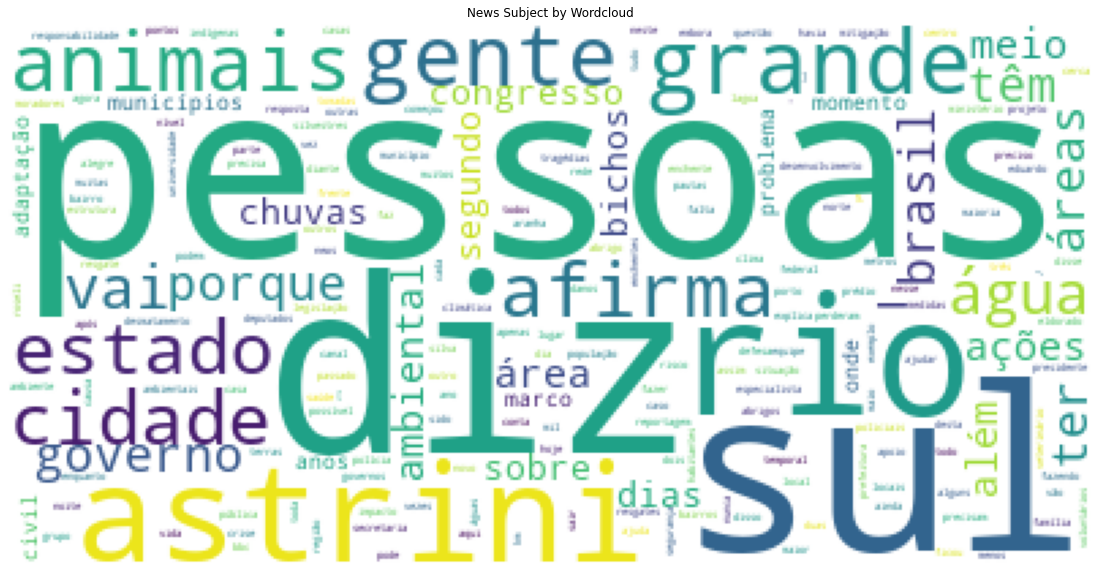

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 10))
plt.axis('off')
plt.title('News Subject by Wordcloud')
plt.imshow(cloud)
plt.show()